In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.clasterization import clasterize
from src.fetch_comments import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [3]:
comments = fetch_comments(id='uYPbbksJxIg', max_result=3000, max_len=1000)

In [4]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens',
 'cohere-english',
 'cohere-multilingual',
 'voyageai']

In [5]:
ind_model = 2

embeddings = embed(model_name=embed_model_names[ind_model], sentences=comments)

print(embed_model_names[ind_model])

embeddings.shape

cohere-multilingual


(3100, 1024)

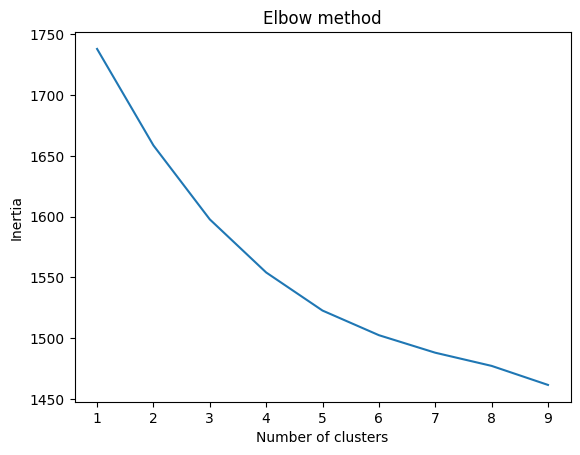

In [6]:
interias = []

for n_clusters in range(1, 10):
    _, kmeans = clasterize('kmeans', embeddings, n_clusters=n_clusters)
    interias.append(kmeans.inertia_)

# Plot the elbow

import matplotlib.pyplot as plt

plt.plot(range(1, 10), interias)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
choosed_n_clusters = 5

In [8]:
from collections import Counter

clasters, kmeans = clasterize(
    method_name='kmeans', 
    embeddings=embeddings,
    n_clusters=choosed_n_clusters)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')


kmeans.inertia_

Claster 0 has 582 comments
Claster 3 has 870 comments
Claster 4 has 640 comments
Claster 1 has 368 comments
Claster 2 has 640 comments


1522.6353860508973

In [9]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Boring ass movie……
----------
Most boring movie of all time. Emphasis on the word BORING!
----------
This movie look boring as hell I can't lie
----------
Bycottt this movieee
----------
Bycottt this movieee
----------
Claster 1
Anime exists because of Oppenheimer
----------
Technically, Oppenheimer is not the inventor of the atomic bomb. He was only the project leader of the weapon that killed many people. The film maker should do a tribute on Nikola Tesla instead. He was the guy that invented many things that benefited the world today.
----------
Christopher Nolan’s “Oppenheimer” is an absolute beast of a film, It is so well made I can not recommend it enough. For anyone who expected it to be a film on the trinity bomb only it would be a bad film, but it was a movie on the life of J. Robert Oppenheimer, which I think Nolan grasped pretty well with the little cuts of the ups and downs of his life, It could be considered boring if your attention span is 10 seconds, but for an

In [22]:
from src.describe_by_llm import describe_claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    result = describe_claster(embeddings_claster, comments_claster)

    print(result)

    print("=" * 100)

Claster 0
All of the comments express a negative opinion, specifically regarding the movie being boring and a waste of time.
Claster 1
The comments praise Christopher Nolan's "Oppenheimer," highlighting its portrayal of J. Robert Oppenheimer's life, the film's cinematic quality, and the profound emotional impact it had on viewers, despite acknowledging it might not appeal to everyone's taste.
Claster 2
The comments share a sentiment of regret, disapproval, and concern about the use of atomic bombs and the negative portrayal of their effects in a movie, highlighting the moral and ethical implications of nuclear weapons and their impact on humanity and history.
Claster 3
All of the comments express high praise and admiration for a movie, describing it as one of the greatest or best movies the commenters have seen.
Claster 4
Each comment consists solely of a repeated emoji or series of emojis without any accompanying text.


In [21]:
from src.sentiment_analysis import comments_sentiment

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]

    result = comments_sentiment(comments_claster)

    print(result)

    print("=" * 100)

Claster 0
0.175
Claster 1
0.51
Claster 2
0.445
Claster 3
0.84
Claster 4
0.725
